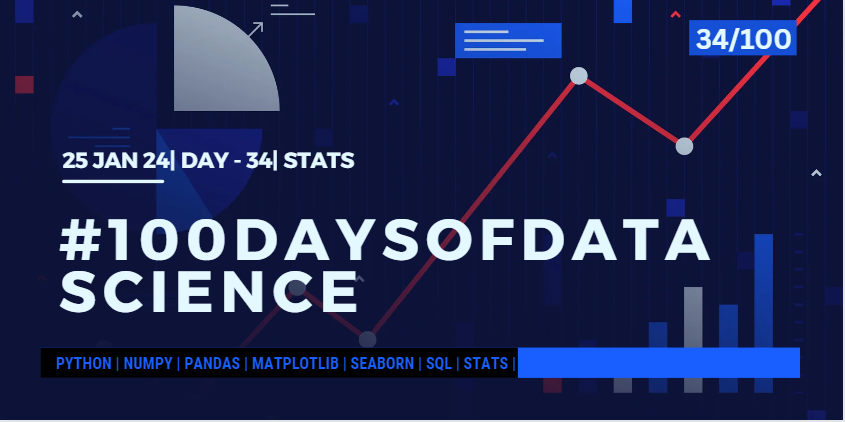

# <center>Statistics - 3 📊<center> <hr style="border:4.5px solid #108999"> </hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import pearsonr
from scipy.stats import ttest_1samp  
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats.weightstats import ztest
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#import scipy.stats as stats
from scipy.stats import chisquare, chi2_contingency
import warnings
warnings.filterwarnings('ignore')

# Hypothesis Testing
* We are trying to claim something or prove it whether it is True or False
* In this either we have been provided with some information or indication we term it as assumption and when nothing is provided still we want to prove something we therm it as assertion
* We have two types of hypothesis
    * Null Hypothesis (H0) - It always include equality statement (=,<=,>=)
    * Alternate Hypothesis (H1/Ha) - It always include statement like (<,>,!=)<br>
    
* It is always about rejecting the null hypothesis or you fail to reject the null hypothesis (When you don't get proper evidence to prove)
* All this rejection depends upon P value which is also called as probalistic value which is equal to 0.05 (P = 0.05)[Level of Significance]
* Confidence Interval = 95% it means we are 95% confident that our statement is true while rest of the 5% is chance of error[*this threshold value is changes for sensitive domain]

### Shapiro–Wilk test
* The Shapiro–Wilk test statistic (Calc W) is basically a measure of how well the ordered and standardized sample quantiles fit the standard normal quantiles. The statistic will take a value between 0 and 1 with 1 being a perfect match.

### ttest_1samp test
* ttest_1samp is a test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.

### ttest_ind test
* ttest_ind is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

### ttest_rel test
* ttest_rel is a test for the null hypothesis that two related or repeated samples have identical average (expected) values.

### ztest test
* z-test is a statistical test to determine whether two population means are different when the variances are known and the sample size is large. A z-test is a hypothesis test in which the z-statistic follows a normal distribution. A z-statistic, or z-score, is a number representing the result from the z-test.

### f_oneway
* The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

### Posthawktest
* This is used to find out the interelation of mean

### Chi square goodness of fit test
* It is a statistical test use to check whether the expected value is same as the observed value

#### When to use chi Square and when to use anova
 - we will use chi square when every variable we are working is categorical and
 - we will use anova when we will have a tleast 1 categorical and 1 continous variable¶

#### When to use what?

* Whenever there is single data given and it is to check the normality we always go with shapiro wik test
* Whenever we need to check dependency between data we work with Pearson
* Whenever there is mean, sd or variance involves and observation is less than 40 we go for Z test
and variance is not involve then T Test
and observation greater than 40 Z test or T test

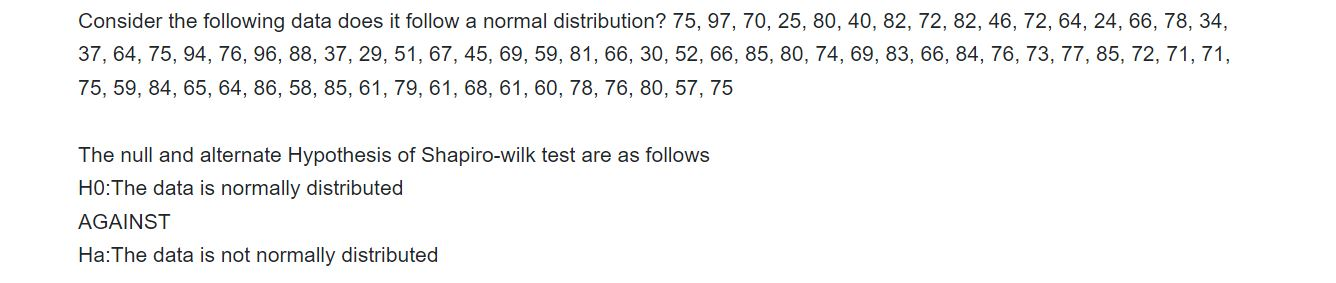

In [2]:
data = pd.Series([75, 97, 70, 25, 80, 40, 82, 72, 82, 46, 72, 64, 24, 66, 78, 34, 37, 64, 75, 94, 76, 96, 88, 37, 29, 51, 67, 45, 69, 59, 81, 66, 30, 52, 66, 85, 80, 74, 69, 83, 66, 84, 76, 73, 77, 85, 72, 71, 71, 75, 59, 84, 65, 64, 86, 58, 85, 61, 79, 61, 68, 61, 60, 78, 76, 80, 57, 75])
data

0     75
1     97
2     70
3     25
4     80
      ..
63    78
64    76
65    80
66    57
67    75
Length: 68, dtype: int64

In [3]:
stat,p = shapiro(data)

print('The test statistic is', stat,'and its p-value is',p)

The test statistic is 0.9307893514633179 and its p-value is 0.0009826984023675323


#### Hence P value is less than 0.05 hence it is not normal distribution and h1 is True

In [4]:
data.describe()

count    68.000000
mean     67.455882
std      16.999942
min      24.000000
25%      60.750000
50%      71.000000
75%      79.250000
max      97.000000
dtype: float64

<Axes: ylabel='Density'>

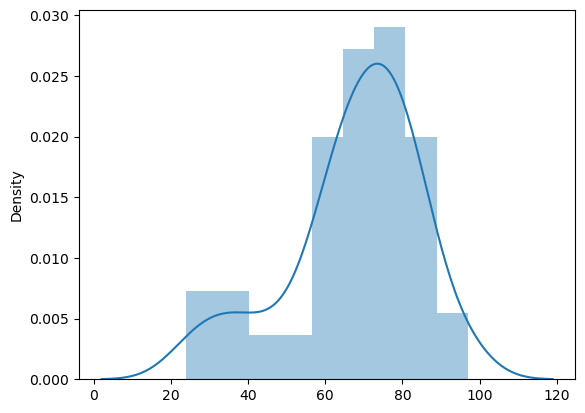

In [5]:
sns.distplot(data)

In [6]:
skewed = skew(data)
skewed

-0.8600736512979936

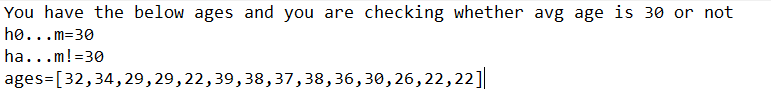

In [7]:
ages=[32,34,29,29,22,39,38,37,38,36,30,26,22,22]
ages_mean = np.mean(ages)
print(ages_mean)
tset,pval = ttest_1samp(ages,30)
print("p-value:",pval)
print("test stats:",tset)

31.0
p-value: 0.5605155888171379
test stats: 0.5973799001456603


We failed to reject null hypothesis as p > 0.05 hence there is There is no significant mean difference in age.

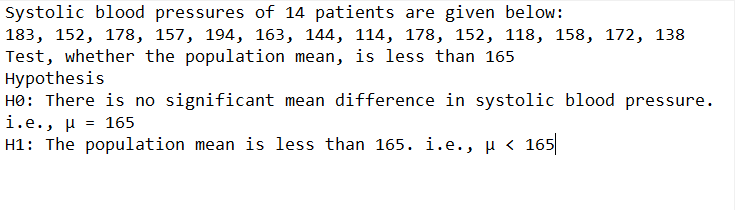

In [8]:
bp = [183, 152, 178, 157, 194, 163, 144, 114, 178, 152, 118, 158, 172, 138]
bp_mean = np.mean(bp)
print(bp_mean)
tset,pval = ttest_1samp(bp,165)
print("p-value:",pval)
print("test stats:",tset)

157.21428571428572
p-value: 0.23575481011813063
test stats: -1.243182877661369


We failed to reject null hypothesis as p > 0.05 hence there is There is no significant mean difference in systolic blood pressure. i.e., μ = 165

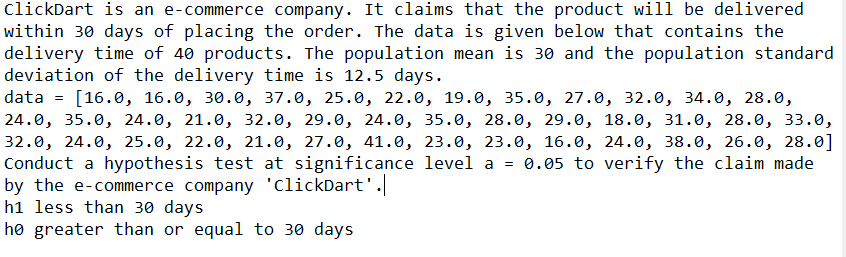

In [9]:
data = [16.0, 16.0, 30.0, 37.0, 25.0, 22.0, 19.0, 35.0, 27.0, 32.0, 34.0, 28.0, 24.0, 35.0, 24.0, 21.0, 32.0, 29.0, 24.0, 35.0, 28.0, 29.0, 18.0, 31.0, 28.0, 33.0, 32.0, 24.0, 25.0, 22.0, 21.0, 27.0, 41.0, 23.0, 23.0, 16.0, 24.0, 38.0, 26.0, 28.0]
data_mean = np.mean(data)
print(data_mean)
tset,pval = ttest_1samp(data,30)
print("p-value:",pval)
print("test stats:",tset)

27.05
p-value: 0.004855140822005159
test stats: -2.9866976252232313


We reject the null hypothesis as p < 0.05 hence the delivery time wil be lessn than 30

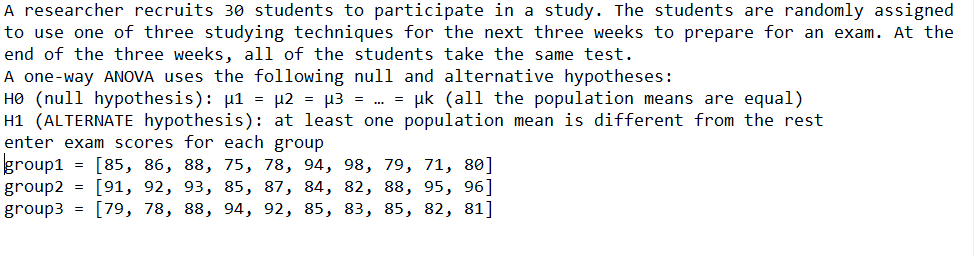

In [10]:
group1 = [85, 86, 88, 75, 78, 94, 98, 79, 71, 80] 
group2 = [91, 92, 93, 90, 97, 94, 82, 88, 95, 96] 
group3 = [79, 78, 88, 94, 92, 85, 83, 85, 82, 81]

tset,pval = f_oneway(group1,group2,group3)
print("p-value:",pval)
print("test stats:",tset) #P value is low null value will go

p-value: 0.012582197136592609
test stats: 5.167774552944481


In [12]:
group1 = [85, 86, 88, 75, 78, 94, 98, 79, 71, 80] 
group2 = [91, 92, 93, 85, 87, 84, 82, 88, 95, 96] 
group3 = [79, 78, 88, 94, 92, 85, 83, 85, 82, 81]

tset,pval = f_oneway(group1,group2,group3)
print("p-value:",pval)
print("test stats:",tset) # P value is high null value wil fly 

p-value: 0.11384795345837218
test stats: 2.3575322551335636


In [13]:
df = pd.DataFrame({'score': [85, 86, 88, 75, 78, 94, 98, 79, 71, 80, 
                             91, 92, 93, 90, 97, 94, 82, 88, 95, 96,
                             79, 78, 88, 94, 92, 85, 83, 85, 82, 81],
                   'group': np.repeat(['a','b','c'],repeats=10)})

tukey = pairwise_tukeyhsd(df['score'], groups = df['group'], alpha = 0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     a      b      8.4 0.0159   1.4259 15.3741   True
     a      c      1.3 0.8894  -5.6741  8.2741  False
     b      c     -7.1 0.0454 -14.0741 -0.1259   True
-----------------------------------------------------


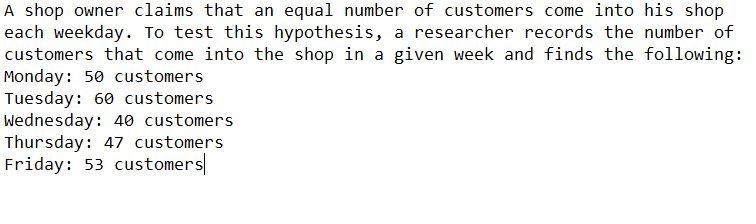

In [14]:
expected = [50,50,50,50,50]
observed = [50,60,40,47,53]

stat,pval=chisquare(f_obs=observed,f_exp=expected)
print("p-value:",pval)
print("test stats:",stat)


p-value: 0.3594720674366307
test stats: 4.359999999999999


Since the p-value (.35947) is not less than 0.05, we fail to reject the null hypothesis.
This means we do not have sufficient evidence to say that the tru distribution of customers is different from the distribution that the shop owner claimed